# 직원 이직 여부 예측
![](https://github.com/Jangrae/img/blob/master/employee.png?raw=true)

## 데이터 정보
- Attrition: 이직여부 (1-Yes 0-No)	
- Age: 나이	
- BusinessTravel: 출장 빈도
- Department: 현재 부서	
- DistanceFromHome: 집과 직장 사이의 거리 (마일)	
- Education: 교육수준 (1-Below College 2-College 3-Bachelor 4- Master 5-Doctor)
- EducationField: 전공	
- EmployeeNumber: 사번	
- EnvironmentSatisfaction: 근무환경에 대한 만족도 (1-Low 2-Good 3-Excellent 4-Outstanding)
- Gender: 성별	
- JobInvolvement: 직무 적극성, 참여도 (1-Low 2-Medium 3-High 4-Very High)
- JobRole: 직무	
- JobSatisfaction: 직무 만족도 (1-Low 2-Medium 3-High 4-Very High)
- MaritalStatus: 결혼상태	
- MonthlyIncome: 월급	
- NumCompaniesWorked: 현재까지 근무한 회사 수	
- OverTime: 야근 여부	
- PercentSalaryHike: 전년대비 급여 인상율 (%)	
- RelationshipSatisfaction: 동료와의 관계 만족도 (1-Low 2-Medium 3-High 4-Very High)
- StockOptionLevel: 스톡옵션 수준 (0 ~ 3)	
- TotalWorkingYears: 총 근무 연수	
- TrainingTimesLastYear: 전년 교육훈련 횟수	
- WorkLifeBalance: 워라밸, 일과 삶의 균형도 (1-Bad 2-Good 3-Better 4-Best)
- YearsAtCompany: 현 직장 근무 연수	
- YearsInCurrentRole: 현 직무 연수	
- YearsWithCurrManager: 현 팀장과 근무한 연수

## 데이터셋 불러오기

In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import missingno as msno

In [68]:
path = 'https://raw.githubusercontent.com/Jangrae/csv/master/Attrition_NA.CSV'

data = pd.read_csv(path)

## 데이터 전처리

* 주석을 상세하게 작성해주세요

<details><summary>Hint</summary>

- x, y 구분 필요
- train, test 구분 필요
- 데이터 타입 전처리 필요
- 데이터 인코딩 필요
- null값 확인 필요

In [69]:
# 데이터 확인 
data.head()

,Attrition,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,OverTime,PercentSalaryHike,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsWithCurrManager
0,No,33,Travel_Rarely,Research & Development,7.0,3,Medical,817,3,Male,...,No,11,4,0,14,3,4,13,9,7
1,No,35,Travel_Frequently,Research & Development,18.0,2,Life Sciences,1412,3,Male,...,No,11,3,0,10,2,3,2,2,2
2,No,42,Travel_Rarely,Research & Development,6.0,3,Medical,1911,3,Male,...,No,13,2,1,18,3,4,13,7,7
3,No,46,Travel_Rarely,Sales,2.0,3,Marketing,1204,3,Female,...,No,23,1,0,28,2,3,26,15,9
4,No,39,Travel_Frequently,Sales,NaN,3,Life Sciences,1812,3,Male,...,No,18,4,1,7,6,3,2,1,2


In [70]:
# 열 형식 확인
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1250 entries, 0 to 1249
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition                 1250 non-null   object 
 1   Age                       1250 non-null   int64  
 2   BusinessTravel            1250 non-null   object 
 3   Department                1250 non-null   object 
 4   DistanceFromHome          1196 non-null   float64
 5   Education                 1250 non-null   int64  
 6   EducationField            1250 non-null   object 
 7   EmployeeNumber            1250 non-null   int64  
 8   EnvironmentSatisfaction   1250 non-null   int64  
 9   Gender                    1250 non-null   object 
 10  JobInvolvement            1250 non-null   int64  
 11  JobRole                   1250 non-null   object 
 12  JobSatisfaction           1250 non-null   int64  
 13  MaritalStatus             1250 non-null   object 
 14  MonthlyI

In [71]:
# 데이터 기초통계량 확인
data.describe()

,Age,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,JobInvolvement,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsWithCurrManager
count,1250.000000,1196.000000,1250.000000,1250.00000,1250.000000,1250.0000,1250.000000,1250.000000,1229.000000,1250.000000,1250.000000,1250.000000,1250.00000,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000
mean,36.931200,9.258361,2.916800,1030.97120,2.739200,2.7272,2.729600,6525.548000,2.678600,15.216000,2.717600,0.796000,11.33920,2.808000,2.761600,7.117600,4.276000,4.166400
std,9.122162,8.166016,1.025436,603.40408,1.096971,0.7102,1.110617,4676.979554,2.473647,3.625556,1.074977,0.851213,7.79687,1.277357,0.715245,6.246966,3.660074,3.610476
min,18.000000,1.000000,1.000000,1.00000,1.000000,1.0000,1.000000,1009.000000,0.000000,11.000000,1.000000,0.000000,0.00000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,30.000000,2.000000,2.000000,496.25000,2.000000,2.0000,2.000000,2932.250000,1.000000,12.000000,2.000000,0.000000,6.00000,2.000000,2.000000,3.000000,2.000000,2.000000
50%,36.000000,7.000000,3.000000,1028.00000,3.000000,3.0000,3.000000,4988.000000,2.000000,14.000000,3.000000,1.000000,10.00000,3.000000,3.000000,5.000000,3.000000,3.000000
75%,43.000000,14.000000,4.000000,1567.00000,4.000000,3.0000,4.000000,8437.500000,4.000000,18.000000,4.000000,1.000000,15.00000,3.000000,3.000000,10.000000,7.000000,7.000000
max,60.000000,29.000000,5.000000,2068.00000,4.000000,4.0000,4.000000,19999.000000,9.000000,25.000000,4.000000,3.000000,40.00000,6.000000,4.000000,40.000000,18.000000,17.000000


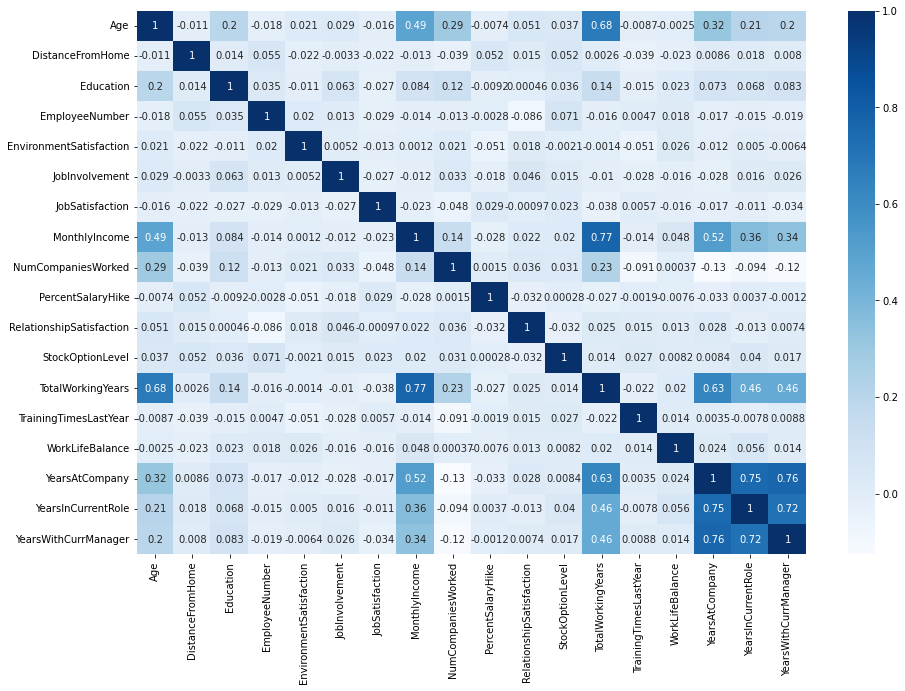

In [72]:
# 변수간 상관관계 확인
# 시각화
plt.figure(figsize=(15, 10))
sns.heatmap(data.corr(), annot=True, cmap='Blues')
plt.show()

---
## EDA

#### target 변수 확인

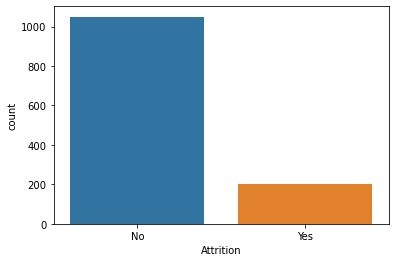

In [73]:
sns.countplot(x='Attrition', data=data)
plt.show()

- 8:2 정도의 비율로 데이터 불균형 문제가 있다.

---
### Null값 확인

In [74]:
# 결측치 확인
data.isnull().sum()

Attrition                    0
Age                          0
BusinessTravel               0
Department                   0
DistanceFromHome            54
Education                    0
EducationField               0
EmployeeNumber               0
EnvironmentSatisfaction      0
Gender                       0
JobInvolvement               0
JobRole                      0
JobSatisfaction              0
MaritalStatus                0
MonthlyIncome                0
NumCompaniesWorked          21
OverTime                     0
PercentSalaryHike            0
RelationshipSatisfaction     0
StockOptionLevel             0
TotalWorkingYears            0
TrainingTimesLastYear        0
WorkLifeBalance              0
YearsAtCompany               0
YearsInCurrentRole           0
YearsWithCurrManager         0
dtype: int64

> DistanceFromHome 변수에 54개의 결측치 존재  

> NumCompaniesWorked 변수에 21개의 결측치 존재

--> 결측치 채우기 방법 : 각 변수에서 빈도수가 가장 높은 값으로 채움

<AxesSubplot:>

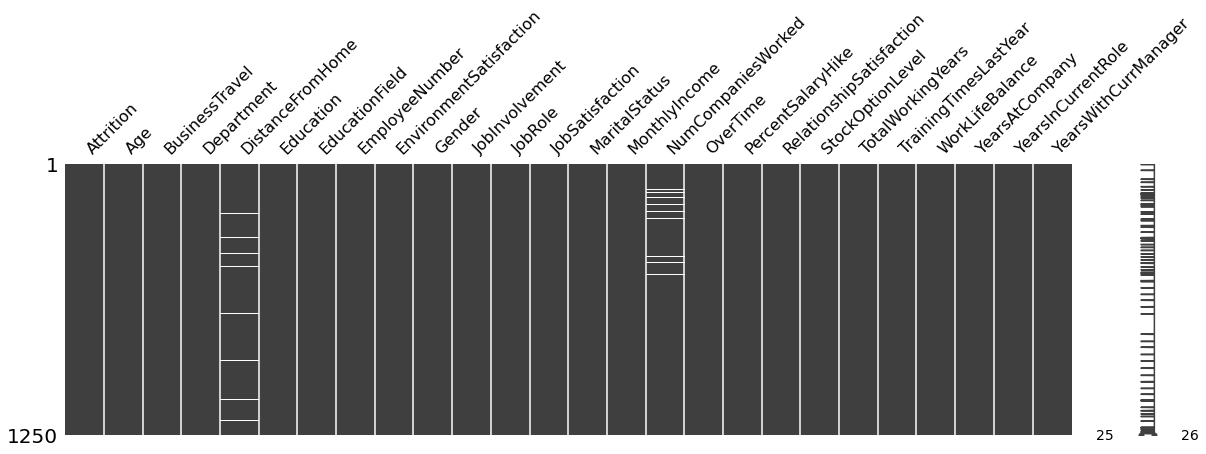

In [75]:
# 결측치 시각화 
msno.matrix(data, figsize=(20, 5))

In [76]:
# 결측치 높은 빈도수를 가진 값으로 채우기
fre_DistanceFromHome = data['DistanceFromHome'].value_counts().idxmax()
fre_NumCompaniesWorked = data['NumCompaniesWorked'].value_counts().idxmax()
data['DistanceFromHome'].fillna(fre_DistanceFromHome, inplace=True)
data['NumCompaniesWorked'].fillna(fre_NumCompaniesWorked, inplace=True)

# 확인
data.isna().sum()

Attrition                   0
Age                         0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
JobInvolvement              0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsWithCurrManager        0
dtype: int64

<AxesSubplot:>

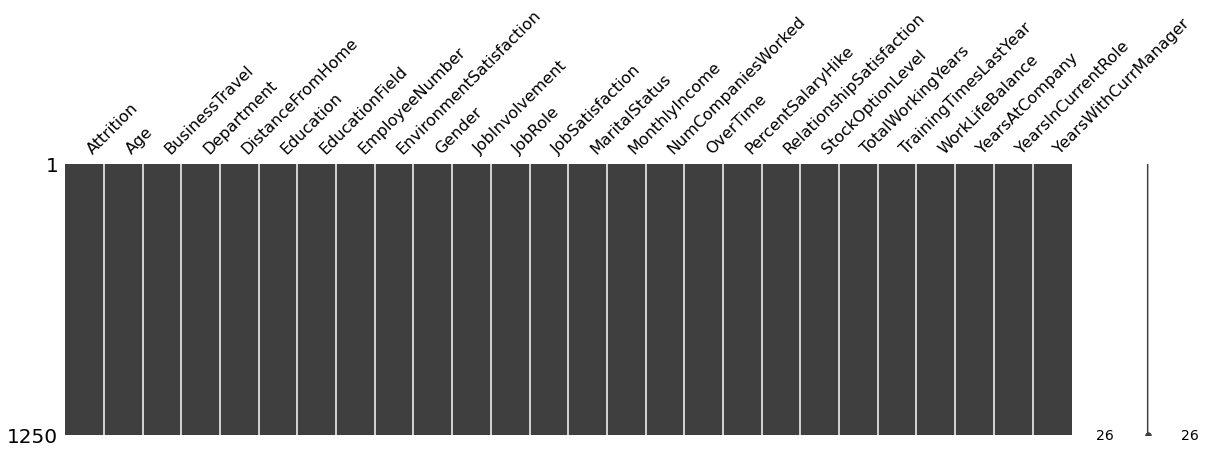

In [77]:
# 결측치 시각화 
msno.matrix(data, figsize=(20, 5))

## 필요없는 변수 제거

- 사번(EmployeeNumber)의 경우 개인마다 다르고 이직 여부와 관련이 없기 때문에 제거

In [78]:
data.shape

(1250, 26)

In [79]:
data.drop('EmployeeNumber', axis=1, inplace=True)

In [80]:
data.shape

(1250, 25)

---
## x 가변수화

In [81]:
# 각 범주형 변수의 클래스 확인
print(data['BusinessTravel'].value_counts())
print('='*40)
print(data['Department'].value_counts())
print('='*40)
print(data['EducationField'].value_counts())
print('='*40)
print(data['Gender'].value_counts())
print('='*40)
print(data['JobRole'].value_counts())
print('='*40)
print(data['MaritalStatus'].value_counts())
print('='*40)
print(data['OverTime'].value_counts())

Travel_Rarely        892
Travel_Frequently    230
Non-Travel           128
Name: BusinessTravel, dtype: int64
Research & Development    819
Sales                     379
Human Resources            52
Name: Department, dtype: int64
Life Sciences       520
Medical             390
Marketing           137
Technical Degree    112
Other                68
Human Resources      23
Name: EducationField, dtype: int64
Male      760
Female    490
Name: Gender, dtype: int64
Sales Executive              283
Research Scientist           246
Laboratory Technician        227
Manufacturing Director       123
Healthcare Representative    110
Manager                       87
Research Director             66
Sales Representative          65
Human Resources               43
Name: JobRole, dtype: int64
Married     570
Single      404
Divorced    276
Name: MaritalStatus, dtype: int64
No     896
Yes    354
Name: OverTime, dtype: int64


In [82]:
# 문자 -> 숫자로 가변수화 진행
data['BusinessTravel'] = data['BusinessTravel'].map({'Travel_Rarely':0, 'Travel_Frequently':1, 'Non-Travel':2})
data['Department'] = data['Department'].map({'Research & Development':0, 'Sales':1, 'Human Resources':2})
data['EducationField'] = data['EducationField'].map({'Life Sciences':0, 'Medical':1, 
                                                     'Marketing':2, 'Technical Degree':3, 'Other':4,
                                                     'Human Resources':5})
data['Gender'] = data['Gender'].map({'Male':0, 'Female':1})
data['JobRole'] = data['JobRole'].map({'Sales Executive':0, 'Research Scientist':1, 
                                       'Laboratory Technician':2, 'Manufacturing Director':3,
                                       'Healthcare Representative':4, 'Manager':5,
                                       'Research Director':6, 'Sales Representative':7,
                                       'Sales Representative':8, 'Human Resources':9})
data['MaritalStatus'] = data['MaritalStatus'].map({'Married':0, 'Single':1, 'Divorced':2})
data['OverTime'] = data['OverTime'].map({'No':0, 'Yes':1})

In [83]:
# 가변수화가 빠짐없이 잘 되었나 확인
data.isna().sum()

Attrition                   0
Age                         0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EnvironmentSatisfaction     0
Gender                      0
JobInvolvement              0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsWithCurrManager        0
dtype: int64

---
## x, y구분

In [84]:
t = 'Attrition'
x = data.drop(t, axis=1)
y = data[t]

# 확인
x.shape, y.shape

((1250, 24), (1250,))

---
## train/test dataset 나누기

In [85]:
# train/test dataset 나누기
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2022)

# 확인
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1000, 24), (250, 24), (1000,), (250,))

---
## 정규화
- 가변수화 진행 후 각 feature별 범위가 다르기 때문에 범위를 [0, 1]로 변환

In [86]:
# 최솟값, 최댓값 설정
min_n = x_train.min()
max_n = x_train.max()

# 정규화
x_train = (x_train - min_n) / (max_n - min_n)
x_test = (x_test - min_n) / (max_n - min_n)

---
## y 데이터 가변수화

In [87]:
y_train.shape, y_test.shape

((1000,), (250,))

In [88]:
# y 컬럼 데이터 클래스 확인
y_train.value_counts()

No     843
Yes    157
Name: Attrition, dtype: int64

> 데이터의 불균형 문제가 보임 -> 모델 성능 문제 발생할 가능성 높음

In [89]:
# No-> 0, Yes -> 1로 변환
y_train = y_train.map({'No':0, 'Yes':1})
y_test = y_test.map({'No':0, 'Yes':1})

# 확인
y_train.shape, y_test.shape

((1000,), (250,))

In [90]:
# 확인
y_train.head(), y_test.head()

(412    0
 380    0
 593    0
 267    1
 312    0
 Name: Attrition, dtype: int64,
 133     0
 1093    1
 223     0
 307     1
 385     1
 Name: Attrition, dtype: int64)

---

# 모델링

1. 전처리에서 제외한 feature를 제외한, 다른 feature는 반드시 모두 사용하셔야 합니다.
2. locally connected layer를 최소 4개 이상 만드세요.
3. 모델 구조 시각화까지 해주면 좋습니다.
4. 학습 횟수는 최대 25번까지만.
---
#### **locally하게 연결한 구성 의도를 반드시 상세하게 남겨주세요 (상황 가정을 해서라도!)** 
#### **주석 역시 상세하게 남겨주세요**

### Locally connected layer를 구성하기 위한 feature 설정

In [91]:
# x feature 확인
x.columns

Index(['Age', 'BusinessTravel', 'Department', 'DistanceFromHome', 'Education',
       'EducationField', 'EnvironmentSatisfaction', 'Gender', 'JobInvolvement',
       'JobRole', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome',
       'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsWithCurrManager'],
      dtype='object')

In [92]:
# Locally connected layer를 구성하기 위한 feature 담기

Basic_Information = ['Age', 'DistanceFromHome', 'Gender', 'MaritalStatus']
Job = ['BusinessTravel', 'Department', 'JobRole', 'OverTime', 'NumCompaniesWorked']
Study = ['Education', 'EducationField', 'TrainingTimesLastYear']
Money = ['MonthlyIncome', 'PercentSalaryHike', 'StockOptionLevel']
Satisfaction = ['EnvironmentSatisfaction', 'JobSatisfaction', 
                'RelationshipSatisfaction', 'WorkLifeBalance']
Year = ['TotalWorkingYears', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsWithCurrManager']

feature 설명
- Basic_Information : 직원의 기본 정보들에 해당하는 feature
    - 나이/집과 직장 사이의 거리/사번/성별/결혼여부  
    
<br>

- Job : 직무와 연관되어 있는 feature
    - 출장 빈도/현재 부서/직무/야근 여부/현재까지 근무한 회사 수  
    
<br>    

- Study : 직원의 교육과 연관되어 있는 feature
    - 교육수준/전공/전년 교육훈련 횟수
    
<br>  

- Money : 직원의 재정상황에 큰 영향을 주는 feature
    - 월급/전년대비 급여 인상율/스톡옵션
    
<br>      
    
- Satisfaction : 직원이 느끼는 만족감에 관한 feature
    - 근무환경에 대한 만족도/직무 만족도/동료와의 관계 만족도/워라밸
    
<br>      

- Year : 직원의 근무를 수치화한 feature
    - 총 근무 연수/현 직장 근무 연수/현 직무 연수/현 팀장과 근무한 연수

In [93]:
# x_train 데이터 나누기
tr_x_B = x_train.loc[:,Basic_Information]
tr_x_J = x_train.loc[:,Job]
tr_x_St = x_train.loc[:,Study]
tr_x_M = x_train.loc[:,Money]
tr_x_Sa = x_train.loc[:,Satisfaction]
tr_x_Y = x_train.loc[:,Year]

# 확인
tr_x_B.shape, tr_x_J.shape, tr_x_St.shape, tr_x_M.shape, tr_x_Sa.shape, tr_x_Y.shape

((1000, 4), (1000, 5), (1000, 3), (1000, 3), (1000, 4), (1000, 4))

In [94]:
# x_test 데이터 나누기
te_x_B = x_test.loc[:,Basic_Information]
te_x_J = x_test.loc[:,Job]
te_x_St = x_test.loc[:,Study]
te_x_M = x_test.loc[:,Money]
te_x_Sa = x_test.loc[:,Satisfaction]
te_x_Y = x_test.loc[:,Year]

# 확인
te_x_B.shape, te_x_J.shape, te_x_St.shape, te_x_M.shape, te_x_Sa.shape, te_x_Y.shape

((250, 4), (250, 5), (250, 3), (250, 3), (250, 4), (250, 4))

---
## 모델 코드 작성

- Locally Conected Model 순차

1. 위에서 생성한 feature별로 input layer 생성
2. hidden layer를 생성하여 각 input layer와 연결
3. 생성된 hidden layer로부터 1번 단계 shape별로 3개의 add layer 생성
4. 전체 x feautre를 가진 input layer 생성
5. 3번 add layer와 4번 input layer를 concat으로 연결
6. hidden layer를 생성하여 concat layer와 연결
7. output layer를 생성하여 compile

#### ※ 3단계 추가 설명 ※
<br>

- Basic_Information(직원의 기본 정보)과 Job(직무)은 회사에서도 가지고 있는 가장 기초적인 직원 정보다.  

두 변수 모두 회사 입사전 지원시기 때부터 얻는 정보이기도 하다.  

-> 각 5개의 feature를 가지고 있는 두 input layer를 add로 함께 연결

<br>

- Study(교육)와 Money(수입)는 통상적으로 연관이 있다고 알려져 있다.   

또한 직원 입사 후에도 직원 스스로가 역량을 쌓지 않는다면 미래의 수입은 달라질 것이다.

-> 각 3개의 feature를 가지고 있는 두 input layer를 add로 함께 연결

<br>

- Satisfaction(만족도)과 Year(연수)는 직원이 어느 분야에서 만족도가 높거나 낮을 때 회사에 다니는 연수가 달라질 것이라 생각한다.

-> 각 4개의 feature를 가지고 있는 두 input layer를 add로 함께 연결

In [95]:
# 모델링을 위한 라이브러리 불러오기
from tensorflow.keras.backend import clear_session
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Add, Concatenate
from tensorflow.keras.activations import relu, sigmoid
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras.optimizers import Adam

from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import plot_model
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, recall_score, precision_score

In [96]:
# 변수 형태 확인
tr_x_B.shape, tr_x_J.shape, tr_x_St.shape, tr_x_M.shape, tr_x_Sa.shape, tr_x_Y.shape, x_train.shape, y_train.shape

((1000, 4),
 (1000, 5),
 (1000, 3),
 (1000, 3),
 (1000, 4),
 (1000, 4),
 (1000, 24),
 (1000,))

In [97]:
######################## Functional API ########################


############## 1. 세션 클리어
clear_session()



############## 2. 레이어 엮기

### 1. 위에서 생성한 feature별로 input layer 생성
# 각 변수들의 feature가 각각 5, 3, 4개로 다르게 주어짐 -> 노드 수 : 5, 3, 4
il_B = Input(shape=(4,), name='input_B')
il_J = Input(shape=(5,), name='input_J')
il_St = Input(shape=(3,), name='input_St')
il_M = Input(shape=(3,), name='input_M')
il_Sa = Input(shape=(4,), name='input_Sa')
il_Y = Input(shape=(4,), name='input_Y')


### 2.hidden layer를 생성하여 각 input layer와 연결
# hidden layer : 노드의 수를 6개로 통일, 활성화는 relu로 생성 
# 6개 통일 이유 : 현재 input layer에서 가지고 있는 노드 수 보다 더 많이 주기 위해
hl_B = Dense(6, activation=relu, name='hidden_B')(il_B)
hl_J = Dense(6, activation=relu, name='hidden_J')(il_J)
hl_St = Dense(6, activation=relu, name='hidden_St')(il_St)
hl_M = Dense(6, activation=relu, name='hidden_M')(il_M)
hl_Sa = Dense(6, activation=relu, name='hidden_Sa')(il_Sa)
hl_Y = Dense(6, activation=relu, name='hidden_Y')(il_Y)


### 3. 생성된 hidden layer로부터 1번 단계 shape별로 3개의 add layer 생성
# 위의 추가 설명 참고(자세한 설명)
# 각 노드의 수의 맞는 5, 3, 4개의 노드를 가진 hidden layer끼리 합치기
al_5 = Add(name='add_5')([hl_B, hl_J])
al_3 = Add(name='add_3')([hl_St, hl_M])
al_4 = Add(name='add_4')([hl_Sa, hl_Y])


### 4. 전체 x feautre를 가진 input layer 생성
# 전체 x feautre의 수 : 25
il = Input(shape=(24,), name='input_total')


### 5. 3번 add layer와 4번 input layer를 concat으로 연결
# 3개의 Add layer와 전체 feature를 가진 input layer를 하나의 레이어로 합치기
cl = Concatenate(name='concatenate_layer')([al_5, al_3, al_4, il] )


### 6. hidden layer를 생성하여 concat layer와 연결
# hidden layer : 노드의 수를 128개 , 활성화는 relu로 생성 
hl =  Dense(128, activation=relu, name='hidden_layer')(cl)


### 7. output layer를 생성하여 compile
# y의 클래스가 2개 -> 이진분류 ->  y의 노드 수 1, activation는 시그모이드 함수로 생성
ol = Dense(1, activation=sigmoid, name='output_layer')(hl)



############## 3. 모델 시작과 끝 설정
# 생성한 feature를 담은 input layer와 전체 feature를 담은 input layer를 inputs으로 넣기
il_list = [il_B, il_J, il_St, il_M, il_Sa, il_Y, il]
model = Model(il_list, ol)



############## 4. 컴파일
model.compile(loss=binary_crossentropy,  # y 의 클래스 2개 -> 이진분류
              metrics='accuracy',        # crossentropy는 직관적이지 않기 때문에 보조적 자료로 정확도 보기
              optimizer=Adam())          # 최적화 방법은 adam

In [98]:
################ 모델 요약
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_B (InputLayer)           [(None, 4)]          0           []                               
                                                                                                  
 input_J (InputLayer)           [(None, 5)]          0           []                               
                                                                                                  
 input_St (InputLayer)          [(None, 3)]          0           []                               
                                                                                                  
 input_M (InputLayer)           [(None, 3)]          0           []                               
                                                                                              

### 모델 구조 시각화

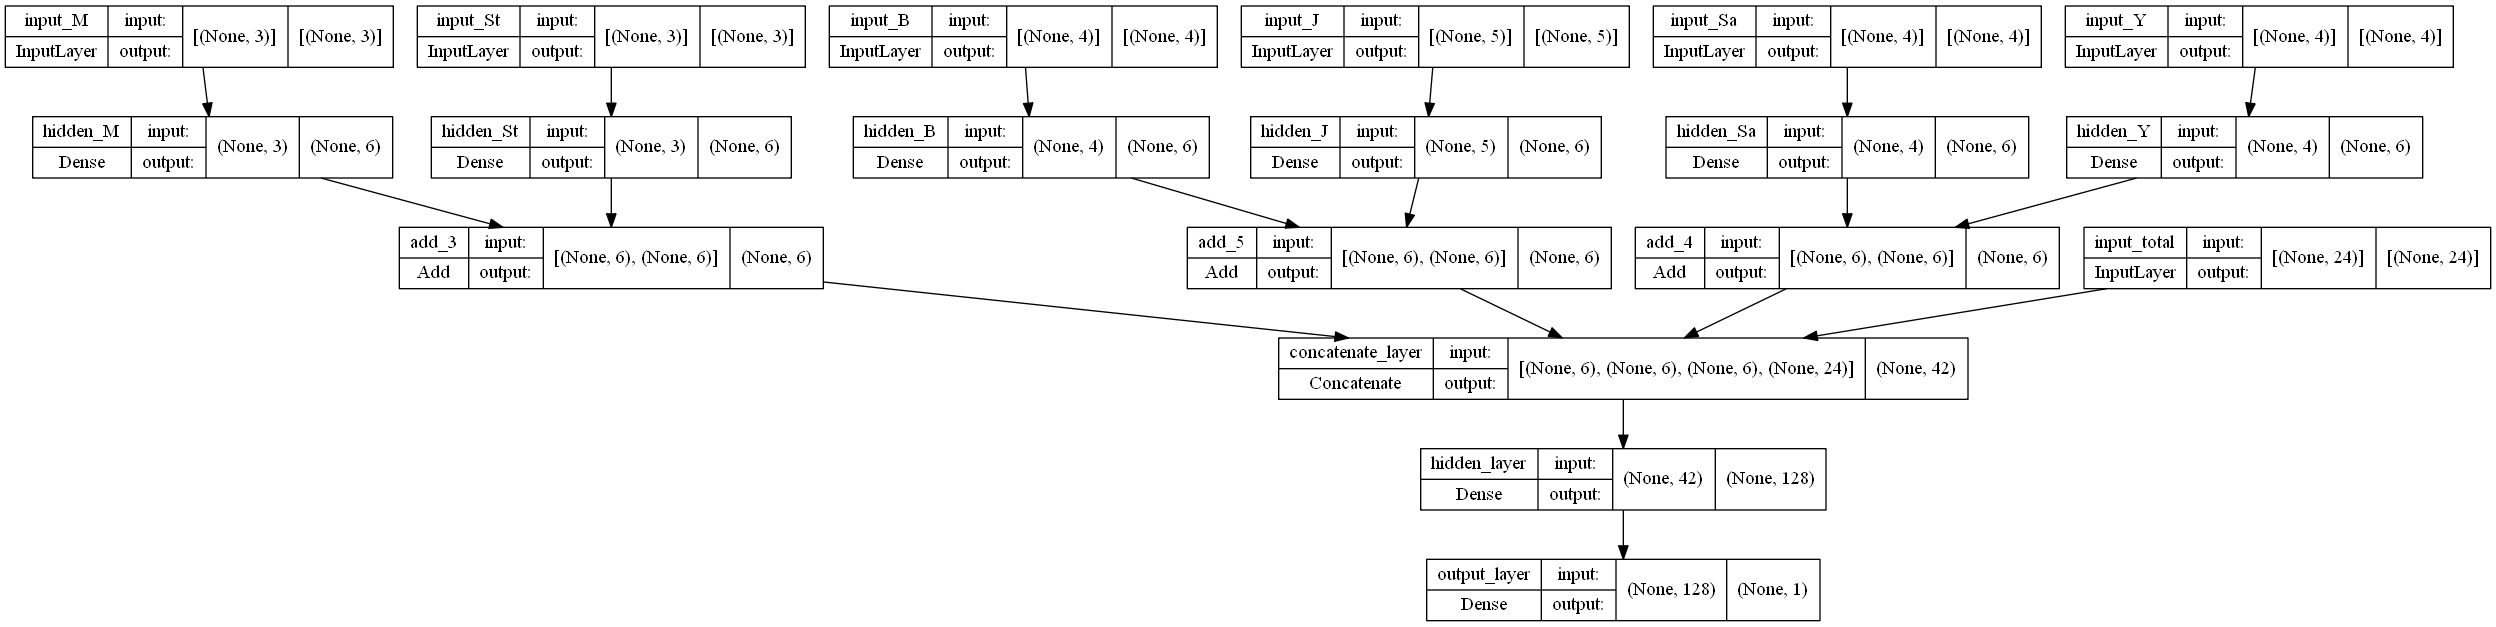

In [99]:
plot_model(model, show_shapes=True, show_layer_names=True)

### 모델 학습

In [100]:
# Early-Stopping
es = EarlyStopping(monitor='val_loss',
                   min_delta=0,
                   patience=5,
                   verbose=1,
                   restore_best_weights=True)

In [101]:
x_input = [tr_x_B, tr_x_J, tr_x_St, tr_x_M, tr_x_Sa, tr_x_Y, x_train]

# 모델 학습
history = model.fit(x=x_input, 
                    y=y_train,
                    epochs=25,
                    verbose=1, 
                    validation_split=0.2,
                    callbacks=[es])

Epoch 1/25
25/25 [==============================] - 1s 10ms/step - loss: 0.4396 - accuracy: 0.8438 - val_loss: 0.4257 - val_accuracy: 0.8400
Epoch 2/25
25/25 [==============================] - 0s 4ms/step - loss: 0.4073 - accuracy: 0.8438 - val_loss: 0.3989 - val_accuracy: 0.8400
Epoch 3/25
25/25 [==============================] - 0s 4ms/step - loss: 0.3829 - accuracy: 0.8438 - val_loss: 0.3773 - val_accuracy: 0.8400
Epoch 4/25
25/25 [==============================] - 0s 4ms/step - loss: 0.3667 - accuracy: 0.8450 - val_loss: 0.3755 - val_accuracy: 0.8400
Epoch 5/25
25/25 [==============================] - 0s 4ms/step - loss: 0.3498 - accuracy: 0.8475 - val_loss: 0.3590 - val_accuracy: 0.8600
Epoch 6/25
25/25 [==============================] - 0s 3ms/step - loss: 0.3368 - accuracy: 0.8612 - val_loss: 0.3500 - val_accuracy: 0.8700
Epoch 7/25
25/25 [==============================] - 0s 3ms/step - loss: 0.3345 - accuracy: 0.8650 - val_loss: 0.3530 - val_accuracy: 0.8800
Epoch 8/25
25/25 [=

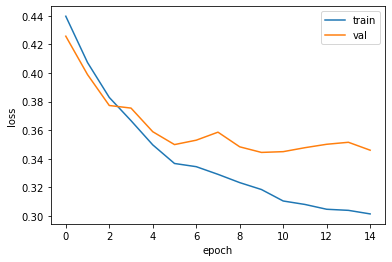

In [102]:
# epoch별 loss 그래프
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

### 모델 예측

In [103]:
# 예측
x_input_test = [te_x_B, te_x_J, te_x_St, te_x_M, te_x_Sa, te_x_Y, x_test]
y_pred = model.predict(x_input_test)

In [104]:
# 예측값 0, 1로 변환
for idx, val in enumerate(y_pred):
    if val >= 0.5:
        y_pred[idx] = 1
    else:
        y_pred[idx] = 0

In [105]:
# 모델 검증 결과
model.evaluate(x_input_test, y_test)

8/8 [==============================] - 0s 2ms/step - loss: 0.3973 - accuracy: 0.8520


[0.3972788155078888, 0.8519999980926514]

In [106]:
# 성능
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.98      0.92       207
           1       0.69      0.26      0.37        43

    accuracy                           0.85       250
   macro avg       0.78      0.62      0.64       250
weighted avg       0.83      0.85      0.82       250



In [107]:
# 성능 리스트에 담기
r_0 = recall_score(y_test, y_pred, average=None)[0]
r_1 = recall_score(y_test, y_pred, average=None)[1]

score_l = []
score_l.append(accuracy_score(y_test, y_pred))
score_l.append(r_1)
score_l.append(precision_score(y_test, y_pred))
score_l.append(r_0)

In [108]:
print('accuracy : {:.2f}'.format(score_l[0]))
print('1의 Recall : {:.2f}'.format(score_l[1]))
print('1의 Precision : {:.2f}'.format(score_l[2]))
print('0의 Recall : {:.2f}'.format(score_l[3]))

accuracy : 0.85
1의 Recall : 0.26
1의 Precision : 0.69
0의 Recall : 0.98


## 평가

1. 모델의 정확도를 기재하시오. 
2. 이직이라 예측한 것 중 실제로 이직한 비율을 구하시오.
3. 실제 이직 데이터 중 모델이 이직이라 예측한 것의 비율을 구하시오.
4. 남는다고 예측한 것 중 실제로 남아있는 비율을 구하시오.





---
### hidden layer 2개를 사용한 multilayer perceptron 구조와 비교하시오.

#### Fully Conacted Model

In [109]:
### Functional API

# 1. 세션 클리어
clear_session()

# 2. 레이어 엮기
il = Input(shape=(24,))
hl = Dense(512, activation=relu)(il)  # hidden layer node 수 : 512
hl = Dense(512, activation=relu)(hl)  # hidden layer node 수 : 512
ol = Dense(1, activation=sigmoid)(hl) # y 클래스 2개 -> sigmoid 이용 

# 3. 모델 시작과 끝 설정
model = Model(il, ol)

# 4. 컴파일
model.compile(loss=binary_crossentropy, # y 클래스 2개 
              metrics='accuracy',       # crossentropy는 직관적이지 않기 때문에 보조적 자료로 정확도 보기
              optimizer=Adam())         # 최적화 : adam

## 모델 요약
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 24)]              0         
                                                                 
 dense (Dense)               (None, 512)               12800     
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dense_2 (Dense)             (None, 1)                 513       
                                                                 
Total params: 275,969
Trainable params: 275,969
Non-trainable params: 0
_________________________________________________________________


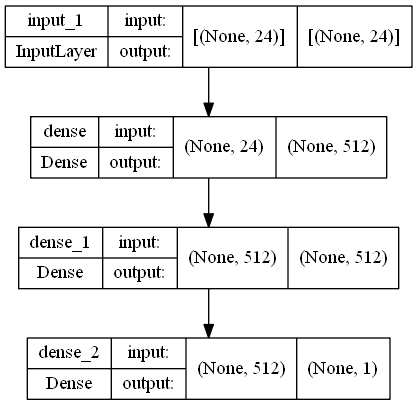

In [110]:
# 모델 시각화
plot_model(model, show_shapes=True)

In [111]:
# 학습
model.fit(x_train, y_train,
          epochs=25,
          verbose=1, 
          validation_split=0.2,
          callbacks=[es])

Epoch 1/25
25/25 [==============================] - 1s 13ms/step - loss: 0.4215 - accuracy: 0.8288 - val_loss: 0.3803 - val_accuracy: 0.8400
Epoch 2/25
25/25 [==============================] - 0s 6ms/step - loss: 0.3603 - accuracy: 0.8500 - val_loss: 0.3586 - val_accuracy: 0.8500
Epoch 3/25
25/25 [==============================] - 0s 6ms/step - loss: 0.3196 - accuracy: 0.8650 - val_loss: 0.3817 - val_accuracy: 0.8400
Epoch 4/25
25/25 [==============================] - 0s 5ms/step - loss: 0.3103 - accuracy: 0.8913 - val_loss: 0.3530 - val_accuracy: 0.8700
Epoch 5/25
25/25 [==============================] - 0s 5ms/step - loss: 0.2920 - accuracy: 0.8875 - val_loss: 0.3591 - val_accuracy: 0.8750
Epoch 6/25
25/25 [==============================] - 0s 6ms/step - loss: 0.2694 - accuracy: 0.9062 - val_loss: 0.3734 - val_accuracy: 0.8600
Epoch 7/25
25/25 [==============================] - 0s 6ms/step - loss: 0.2518 - accuracy: 0.9125 - val_loss: 0.3740 - val_accuracy: 0.8650
Epoch 8/25
25/25 [=

In [112]:
# 예측
y_pred = model.predict(x_test)

# 예측값 0, 1로 변환
for idx, val in enumerate(y_pred):
    if val >= 0.5:
        y_pred[idx] = 1
    else:
        y_pred[idx] = 0

In [113]:
# 정확도 확인
model.evaluate(x_test, y_test)

8/8 [==============================] - 0s 2ms/step - loss: 0.4079 - accuracy: 0.8480


[0.40785205364227295, 0.8479999899864197]

In [114]:
# 성능 확인
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.95      0.91       207
           1       0.59      0.37      0.46        43

    accuracy                           0.85       250
   macro avg       0.74      0.66      0.68       250
weighted avg       0.83      0.85      0.83       250



In [115]:
# 성능 리스트에 담기
r_0 = recall_score(y_test, y_pred, average=None)[0]
r_1 = recall_score(y_test, y_pred, average=None)[1]

score_f = []
score_f.append(accuracy_score(y_test, y_pred))
score_f.append(r_1)
score_f.append(precision_score(y_test, y_pred))
score_f.append(r_0)

score_f

[0.848, 0.37209302325581395, 0.5925925925925926, 0.9468599033816425]

In [116]:
print('accuracy : {:.2f}'.format(score_f[0]))
print('1의 Recall : {:.2f}'.format(score_f[1]))
print('1의 Precision : {:.2f}'.format(score_f[2]))
print('0의 Recall : {:.2f}'.format(score_f[3]))

accuracy : 0.85
1의 Recall : 0.37
1의 Precision : 0.59
0의 Recall : 0.95


---
## Data Resampling

 - 위에서 target변수의 데이터 불균형 문제가 있었다.
 - 총 데이터의 수가 1250개이므로 오버 샘플링 진행 후 분석 진행
 - 정확한 분석을 위해 train 데이터에 대해서만 진행

In [117]:
data.shape

(1250, 25)

In [118]:
# Target 값 분포 확인
y.value_counts()

No     1050
Yes     200
Name: Attrition, dtype: int64

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


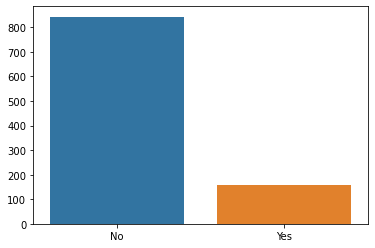

In [119]:
# Target 값 분포 시각화

cnt = y_train.value_counts()
a = cnt.values
b = cnt.index

sns.barplot(b, a)
plt.xticks(b, ['No', 'Yes'])
plt.show()

In [120]:
# Over Sampling
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=2022)
x_over, y_over = smote.fit_resample(x_train, y_train)

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


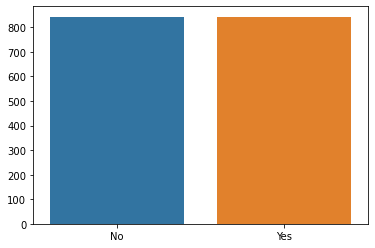

In [121]:
# Target 값 분포 시각화

cnt = y_over.value_counts()
a = cnt.values
b = cnt.index

sns.barplot(b, a)
plt.xticks(b, ['No', 'Yes'])
plt.show()

## 모델링
- Fully Conacted Model

In [122]:
### Functional API

# 1. 세션 클리어
clear_session()

# 2. 레이어 엮기
il = Input(shape=(24,))
hl = Dense(512, activation=relu)(il)  # hidden layer node 수 : 512
hl = Dense(512, activation=relu)(hl)  # hidden layer node 수 : 512
ol = Dense(1, activation=sigmoid)(hl) # y 클래스 2개 -> sigmoid 이용 

# 3. 모델 시작과 끝 설정
model_re = Model(il, ol)

# 4. 컴파일
model.compile(loss=binary_crossentropy, # y 클래스 2개 
              metrics='accuracy',       # crossentropy는 직관적이지 않기 때문에 보조적 자료로 정확도 보기
              optimizer=Adam())         # 최적화 : adam

## 모델 요약
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 24)]              0         
                                                                 
 dense (Dense)               (None, 512)               12800     
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dense_2 (Dense)             (None, 1)                 513       
                                                                 
Total params: 275,969
Trainable params: 275,969
Non-trainable params: 0
_________________________________________________________________


In [123]:
# 학습
model.fit(x_over, y_over,
epochs=25,
verbose=1,
validation_split=0.2,
callbacks=[es])

Epoch 1/25
43/43 [==============================] - 1s 11ms/step - loss: 0.4600 - accuracy: 0.8064 - val_loss: 0.7679 - val_accuracy: 0.6065
Epoch 2/25
43/43 [==============================] - 0s 6ms/step - loss: 0.3851 - accuracy: 0.8361 - val_loss: 0.7309 - val_accuracy: 0.5976
Epoch 3/25
43/43 [==============================] - 0s 6ms/step - loss: 0.3289 - accuracy: 0.8635 - val_loss: 0.4110 - val_accuracy: 0.8166
Epoch 4/25
43/43 [==============================] - 0s 6ms/step - loss: 0.2590 - accuracy: 0.8976 - val_loss: 0.2544 - val_accuracy: 0.9231
Epoch 5/25
43/43 [==============================] - 0s 5ms/step - loss: 0.2256 - accuracy: 0.9147 - val_loss: 0.3255 - val_accuracy: 0.8698
Epoch 6/25
43/43 [==============================] - 0s 5ms/step - loss: 0.1877 - accuracy: 0.9340 - val_loss: 0.1283 - val_accuracy: 0.9675
Epoch 7/25
43/43 [==============================] - 0s 5ms/step - loss: 0.1407 - accuracy: 0.9540 - val_loss: 0.2368 - val_accuracy: 0.9172
Epoch 8/25
43/43 [=

In [124]:
# 예측
y_pred_re = model.predict(x_test)

In [125]:
# 예측값 0, 1로 변환
for idx, val in enumerate(y_pred_re):
    if val >= 0.5:
        y_pred_re[idx] = 1
    else:
        y_pred_re[idx] = 0

In [126]:
# 성능 확인
print(classification_report(y_test, y_pred_re))

              precision    recall  f1-score   support

           0       0.89      0.93      0.91       207
           1       0.59      0.47      0.52        43

    accuracy                           0.85       250
   macro avg       0.74      0.70      0.72       250
weighted avg       0.84      0.85      0.84       250



- target 데이터에 대한 Data Resampling 진행 후, 앞 두 모델보다 1에 대한 recall 값이 향상된 것을 볼 수 있다.

---


---

# 총 평가

In [127]:
print('===== Locally Conacted Model =====')
print('모델의 정확도 : {:.2f}'.format(score_l[0]))
print('이직이라 예측한 것 중 실제로 이직한 비율 : {:.2f}'.format(score_l[1]))
print('실제 이직 데이터 중 모델이 이직이라 예측한 것의 비율 : {:.2f}'.format(score_l[2]))
print('남는다고 예측한 것 중 실제로 남아있는 비율 : {:.2f}'.format(score_l[3]))

===== Locally Conacted Model =====
모델의 정확도 : 0.85
이직이라 예측한 것 중 실제로 이직한 비율 : 0.26
실제 이직 데이터 중 모델이 이직이라 예측한 것의 비율 : 0.69
남는다고 예측한 것 중 실제로 남아있는 비율 : 0.98


In [128]:
print('===== Fully Conacted Model =====')
print('모델의 정확도 : {:.2f}'.format(score_f[0]))
print('이직이라 예측한 것 중 실제로 이직한 비율 : {:.2f}'.format(score_f[1]))
print('실제 이직 데이터 중 모델이 이직이라 예측한 것의 비율 : {:.2f}'.format(score_f[2]))
print('남는다고 예측한 것 중 실제로 남아있는 비율 : {:.2f}'.format(score_f[3]))

===== Fully Conacted Model =====
모델의 정확도 : 0.85
이직이라 예측한 것 중 실제로 이직한 비율 : 0.37
실제 이직 데이터 중 모델이 이직이라 예측한 것의 비율 : 0.59
남는다고 예측한 것 중 실제로 남아있는 비율 : 0.95


- 두 모델이 약 0.7정도의 성능(0.84, 0.65)을 가진다.
    - target 변수의 데이터 불균형 문제일 가능성이 있다.
    - 데이터 resampling을 하여 성능을 확인해볼 필요가 있다.

<br>
    
- 두 모델 다 1의 Recall, Precision 값이 낮게 나왔다.
    - 이것도 target 변수의 데이터 불균형일 가능성이 있다.
    
<br>    



- 블랙박스 모델이기 때문에 학습을 진행할 때마다 다른 성능을 가지게 된다.
    - 첫 번째 학습할 때) Locally Conacted Model에서 새로운 feature를 생성하여 진행하였지만 오히려 Fully 모델보다 성능이 더 낮게 나왔다.
    - 두 번째 학습할 때) Locally Conacted Model모델이 0.84로 Fully 모델 0.65보다 훨씬 높은 성능을 가진다.
    - 새로운 feature 생성하는 것도 모델의 성능을 좌우할 수 있는 것을 확인하였다.
    - 현재 모델에서는 모든 feature를 이용하여 새로운 feature를 생성하였지만, 다음 모델링을 할 때는 서로 상관관계가 있는 feature 끼리 모으는 방법을 적용해보고 싶다.
    
<br>

- 잔류의 Precision이 두 모델 다 높으므로(0.99, 0.71), 이 모델을 이용하여 직원 이탈 여부를 예측하는 것보다는 현재 직원의 잔류 여부를 예측하는 용도로 사용하면 좋을 것 같다.